In [1]:
### Track cells through shape and distance

In [1]:
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
from glob import glob
from natsort import natsorted
import imageio.v2 as iio

In [2]:
t1 = natsorted(glob("t1/*png"))
test_image_path = t1[10]
test_image = iio.imread(test_image_path)

In [3]:
test_image = test_image[:, :, :3]  # Keep only the first three channels (RGB)

In [4]:
from PIL import Image
import numpy as np

# Load the image
img = Image.open(test_image_path)

# Convert the image to RGB
img = img.convert('RGB')

# Convert the image to a numpy array
img_array = np.array(img)

# Apply thresholding to each color channel
for i in range(3):  # For each color channel
    img_array[..., i] = np.where(img_array[..., i] > np.mean(img_array[..., i]), 255, 0)

# Convert the numpy array back to an image
img_thresholded = Image.fromarray(np.uint8(img_array))

In [5]:
test_image = img_thresholded
test_image = np.array(test_image)

In [6]:
# Assuming test_image is a numpy array of shape (height, width, channels)
height, width, _ = test_image.shape

# Initialize an empty dictionary to hold the color to label mappings
color_to_label = {}
label = 0  # Initialize label counter

# Initialize an empty dictionary to hold the label to color mappings
label_to_color = {}

# Iterate over each pixel in the image
for x in range(height):
    for y in range(width):
        color = tuple(test_image[x, y])
        # Check if the color is already in the dictionary
        if color not in color_to_label:
            # Assign a new label to this unique color
            color_to_label[color] = label
            label_to_color[label] = color
            label += 1  # Increment label for the next unique color

# Now, color_to_label contains mappings from colors to labels
# and label_to_color contains mappings from labels to colors

# If you need to create a labeled image based on these mappings:
labeled_image = np.zeros((height, width, 3), dtype=np.uint8)

# Assign labels to the original image based on the color
for x in range(height):
    for y in range(width):
        color = tuple(test_image[x, y])
        label = color_to_label[color]
        # Here you can decide how to use the label. For example, you might want to:
        # - Directly use the label as a color (if it makes sense in your context)
        # - Map the label to a specific color using label_to_color
        # For demonstration, let's just copy the original color using the label
        labeled_image[x, y] = np.array(label_to_color[label], dtype=np.uint8)

# labeled_image now contains the image with labels assigned to each pixel

In [7]:
# Initialize cells array with the correct shape
rows, cols = (len(color_to_label), 0)
# method 2 1st approach
cells = [[] for _ in range(rows)]

# Rest of the code remains the same
im = test_image[:, :, :3]

In [8]:
cells

[[], [], [], [], [], []]

In [9]:
for x in range(height):
    for y in range(width):
        color = tuple(im[x, y])
        label = color_to_label[color]
        cells[label].append(tuple((x, y)))

In [11]:
def load_outlines(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    cells = []
    for line in lines:
        # Split the line at semicolons, convert each pair to a list of integers
        cell = [list(map(int, pair.split(','))) for pair in line.strip().split(';')]
        # Convert the list of pairs to a numpy array and reshape it into pairs of coordinates
        cell = np.reshape(cell, (-1, 2))
        cells.append(cell)

    return cells
    
# Load the outlines
cells = load_outlines('New_Visualization_Step/AI_Segmentation_Output/seg_t2/txt_outlines/12_cp_outlines.txt')

In [12]:
centers = []
for arr in cells:
    total = (0,0)
    count = 0
    for point in arr:
        total = tuple(map(sum, zip(total, point)))
        count += 1
    
    center = tuple(x/count for x in total)
    centers.append(center)

In [13]:
compare_image = t1[11]
compare_image = iio.imread(compare_image)
compare_image = compare_image[:, :, :3]


In [14]:
from PIL import Image
import numpy as np

# Load the image
img = Image.open('t1/12.png')

# Convert the image to RGB
img = img.convert('RGB')

# Convert the image to a numpy array
img_array = np.array(img)

# Apply thresholding to each color channel
for i in range(3):  # For each color channel
    img_array[..., i] = np.where(img_array[..., i] > np.mean(img_array[..., i]), 255, 0)

# Convert the numpy array back to an image
img_thresholded = Image.fromarray(np.uint8(img_array))

In [15]:
compare_image = img_thresholded
compare_image = np.array(compare_image)

In [ ]:
color_to_label

In [17]:
# Assuming test_image is a numpy array of shape (height, width, channels)
height, width, _ = compare_image.shape

# Initialize an empty dictionary to hold the color to label mappings
color_to_label = {}
label = 0  # Initialize label counter

# Initialize an empty dictionary to hold the label to color mappings
label_to_color = {}

# Iterate over each pixel in the image
for x in range(height):
    for y in range(width):
        color = tuple(compare_image[x, y])
        # Check if the color is already in the dictionary
        if color not in color_to_label and color != (255, 255, 255) and color != (0, 255, 0):
            # Assign a new label to this unique color
            color_to_label[color] = label
            label_to_color[label] = color
            label += 1  # Increment label for the next unique color

# Now, color_to_label contains mappings from colors to labels
# and label_to_color contains mappings from labels to colors

# If you need to create a labeled image based on these mappings:
labeled_image = np.zeros((height, width, 3), dtype=np.uint8)

# Assign labels to the original image based on the color
for x in range(height):
    for y in range(width):
        color = tuple(compare_image[x, y])
        if (color == (255, 255, 255)) or (color == (0, 255, 0)):
            continue
        label = color_to_label[color]
        # Here you can decide how to use the label. For example, you might want to:
        # - Directly use the label as a color (if it makes sense in your context)
        # - Map the label to a specific color using label_to_color
        # For demonstration, let's just copy the original color using the label
        labeled_image[x, y] = np.array(label_to_color[label], dtype=np.uint8)

# labeled_image now contains the image with labels assigned to each pixel

In [18]:
# Initialize cells array with the correct shape
rows2, cols2 = (len(color_to_label), 0)
# method 2 1st approach
cells2 = [[] for _ in range(rows2)]

In [19]:
im = compare_image[:, :, :3]

In [20]:
for x in range(height):
    for y in range(width):
        color = tuple(im[x, y])
        if (color == (255, 255, 255)) or (color == (0, 255, 0)):
            continue 
        label = color_to_label[color]
        cells2[label].append(tuple((x, y)))

In [22]:
centers2 = []
for arr in cells2:
    total = (0,0)
    count = 0
    for point in arr:
        total = tuple(map(sum, zip(total, point)))
        count += 1
    
    center = tuple(x/count for x in total)
    centers2.append(center)

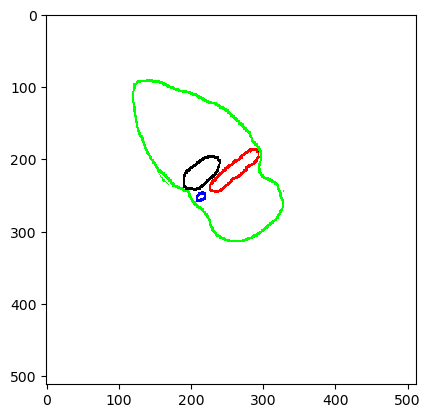

In [28]:
plt.imshow(compare_image, cmap='gray', interpolation='none')


In [29]:
from PIL import Image
import numpy as np

# Load the image
img = Image.open('t1/12.png')
img_array = np.array(img)
img_array = img_array[:, :, :3]

# Create a mask for the green pixels
green_mask = np.all(img_array == [0, 255, 0], axis=-1)

# Set the green pixels to white
img_array[green_mask] = [255, 255, 255]

In [ ]:
plt.imshow(img_array, cmap='gray')

In [ ]:
from skimage import feature
from PIL import Image
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

outline = Image.open('t1_12.png')
outline = np.array(outline)
outline = outline[:, :, :3]
outline = rgb2gray(outline)

# Assuming img_array is your grayscale image
edges = feature.canny(outline, sigma=1)

plt.imshow(edges, cmap='gray', interpolation='none')
plt.show()

In [22]:
from cellpose import utils

In [23]:
curr_outline = []
for i in range(len(np.unique(edges))):
    arg = (edges, i)
    out = utils.get_outline_multi(arg)
    curr_outline.append(out)


In [27]:
import numpy as np

# Assuming image is your original image and outline_arr is your list of outlines
image = np.zeros((512, 512))  # Replace height and width with the actual dimensions of your image

for i, r in enumerate(curr_outline):
    for point in r:
        x, y = point  # Assuming point is a tuple (x, y)
        image[x, y] = i + 1  # Assign the label (i+1) to the corresponding position in the image

In [ ]:
plt.imshow(image)

In [27]:
centers_rotated = np.array(centers)

In [28]:
centers_rotated = np.rot90(centers_rotated)

In [8]:
from PIL import Image
img = Image.open('Raw_data_for_Segmentation/t2/12.tif')
rotated_img = img.rotate(270)

In [4]:
cells2 = load_outlines('New_Visualization_Step/AI_Segmentation_Output/seg_t3/txt_outlines/12_cp_outlines.txt')

centers2 = []
for i, arr in enumerate(cells2):
    total = (0,0)
    count = 0
    for point in arr:
        total = tuple(map(sum, zip(total, (point[1], point[0]))))
        count += 1
    
    center = tuple(x/count for x in total)
    centers2.append(center)

In [90]:
centers

[Ellipsis]

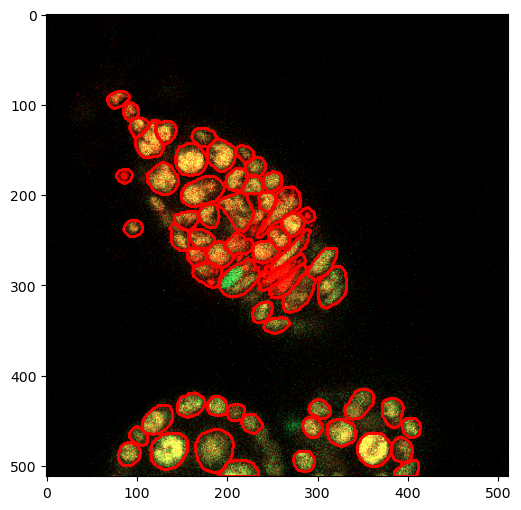

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img, cmap='nipy_spectral')

for i, arr in enumerate(cells):
    for point in arr:
        ax.plot(point[0], point[1], 'ro', markersize=1)

plt.show()

In [91]:
cells = load_outlines('New_Visualization_Step/AI_Segmentation_Output/seg_t2/txt_outlines/12_cp_outlines.txt')

centers = []
for i, arr in enumerate(cells):
    total = (0,0)
    count = 0
    for point in arr:
        total = tuple(map(sum, zip(total, (point[1], point[0]))))
        count += 1
    
    center = tuple(x/count for x in total)
    centers.append(center)

In [14]:
def centers_to_dict(centers):
    return {i: center for i, center in enumerate(centers, start=1)}

centers_dict = centers_to_dict(centers)

In [15]:
def calculate_shift(centers, centers2):
    shifts = []
    for (x1, y1), (x2, y2) in zip(centers, centers2):
        shift_x = x2 - x1
        shift_y = y2 - y1
        shifts.append((shift_x, shift_y))
    return shifts

In [16]:
def calculate_average_shift(shifts):
    total_shift_x = sum(shift[0] for shift in shifts)
    total_shift_y = sum(shift[1] for shift in shifts)
    average_shift_x = total_shift_x / len(shifts)
    average_shift_y = total_shift_y / len(shifts)
    return average_shift_x, average_shift_y

In [18]:
shifts = calculate_shift(centers, centers2)
average_shift = calculate_average_shift(shifts)
average_shift

(53.06715387159862, -87.59613459288508)

In [34]:
import math

def find_closest_centers(centers, centers2, average_shift):
    centers_dict = {i: center for i, center in enumerate(centers, start=1)}
    closest_centers_dict = {}
    assigned_centers = set()

    for i2, (x2, y2) in enumerate(centers2, start=1):
        x2_shifted = x2 - average_shift[0]
        y2_shifted = y2 - average_shift[1]
        closest_distance = math.inf
        closest_center = None

        for i1, (x1, y1) in centers_dict.items():
            if i1 in assigned_centers:
                continue
            distance = math.sqrt((x2_shifted - x1)**2 + (y2_shifted - y1)**2)
            if distance < closest_distance:
                closest_distance = distance
                closest_center = i1

        closest_centers_dict[i2] = closest_center
        assigned_centers.add(closest_center)

    return closest_centers_dict

In [ ]:
closest_centers_dict = find_closest_centers(centers, centers2, average_shift)

In [37]:
centers2_dict = {i: centers2[closest_center] for i, closest_center in closest_centers_dict.items() if closest_center is not None}

In [38]:
print(centers2_dict.values())

dict_values([(224.515625, 294.609375), (181.66071428571428, 125.69642857142857), (164.07476635514018, 158.55140186915887), (125.52272727272727, 122.13636363636364), (227.4795918367347, 274.6020408163265), (222.94505494505495, 183.62637362637363), (123.26086956521739, 102.54347826086956), (263.9146341463415, 159.79268292682926), (190.74074074074073, 257.30864197530866), (140.41304347826087, 122.97826086956522), (274.54545454545456, 313.04545454545456), (236.33333333333334, 97.0), (253.21917808219177, 176.1917808219178), (207.72151898734177, 274.0), (128.9855072463768, 138.95652173913044), (319.6373626373626, 314.2087912087912), (270.3734939759036, 199.75903614457832), (249.46296296296296, 267.4074074074074), (293.82, 253.61), (202.47761194029852, 233.7462686567164), (318.96666666666664, 229.63333333333333), (174.39506172839506, 235.0), (258.14942528735634, 288.5287356321839), (303.4901960784314, 207.87254901960785), (349.1764705882353, 254.9558823529412), (427.46753246753246, 340.727272

In [39]:
len(centers)

61

In [40]:
len(centers2_dict)

61

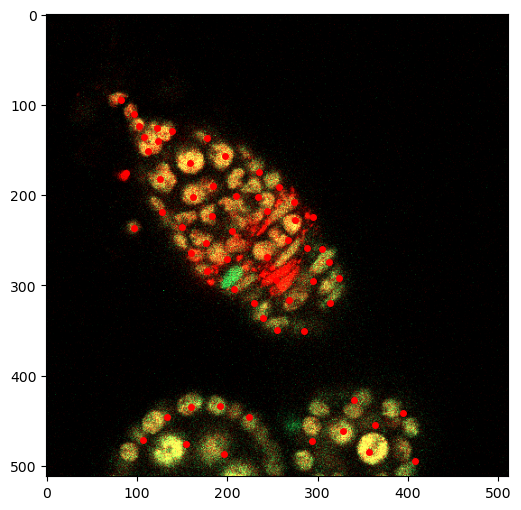

In [41]:
# Display the image with centers
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img, cmap='nipy_spectral')

for center in centers2_dict.values():
    ax.plot(center[1], center[0], 'ro', markersize=4)  # 'ro' means red dots

plt.show()

In [79]:
img_8 = Image.open('Raw_data_for_Segmentation/t2/8.tif')

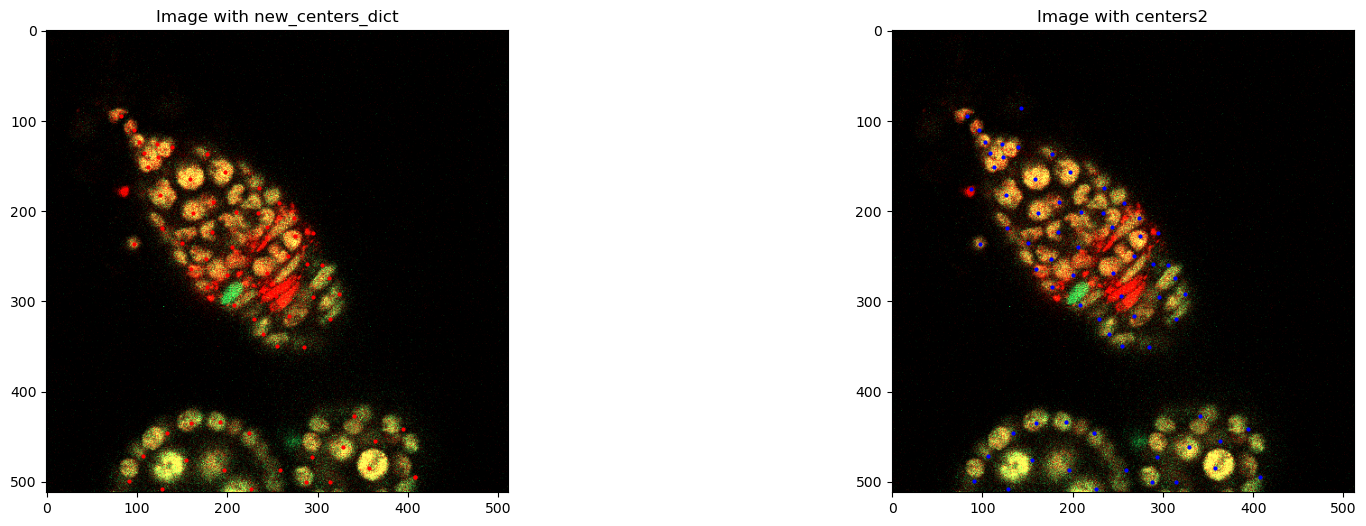

In [85]:
# Display the images side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

# Plot new_centers_dict
ax1.imshow(img, cmap='nipy_spectral')
for center in new_centers_dict.values():
    ax1.plot(center[1], center[0], 'ro', markersize=2)  # 'ro' means red dots
ax1.set_title('Image with new_centers_dict')

# Plot centers2
ax2.imshow(img, cmap='nipy_spectral')
for center in centers2:
    ax2.plot(center[1], center[0], 'bo', markersize=2)  # 'bo' means blue dots
ax2.set_title('Image with centers2')

plt.show()

In [89]:
outlines_4 = load_outlines('4_cp_outlines.txt')
outlines_8 = load_outlines('8_cp_outlines.txt')

In [90]:
centers_4 = []
for i, arr in enumerate(outlines_4):
    total = (0,0)
    count = 0
    for point in arr:
        total = tuple(map(sum, zip(total, (point[1], point[0]))))
        count += 1
    
    center = tuple(x/count for x in total)
    centers_4.append(center)

In [91]:
centers_8 = []
for i, arr in enumerate(outlines_8):
    total = (0,0)
    count = 0
    for point in arr:
        total = tuple(map(sum, zip(total, (point[1], point[0]))))
        count += 1
    
    center = tuple(x/count for x in total)
    centers_8.append(center)

In [92]:
centers_4_dict = centers_to_dict(centers_4)
centers_8_dict = centers_to_dict(centers_8)

In [93]:
shift_slices = calculate_shift(centers_4, centers_8)
shift_slices = calculate_average_shift(shift_slices)

In [73]:
closest_centers = find_closest_centers(centers_4, centers_8, shift_slices)

In [75]:
centers_slice_dict = {i: centers_8[closest_center] for i, closest_center in closest_centers.items() if closest_center is not None}

In [87]:
# Create a new dictionary with all values from centers2_dict
slice = {i: center for i, center in centers_8_dict.items()}

# Add any additional values from centers2 if centers2 is larger than centers
if len(centers_8) > len(centers_4):
    for i in range(len(centers) + 1, len(centers2) + 1):
        slice[i] = centers_8[i - 1]

slice

{1: (16.933333333333334, 61.56666666666667),
 2: (129.41304347826087, 65.6086956521739),
 3: (143.67816091954023, 148.94252873563218),
 4: (150.47297297297297, 127.63513513513513),
 5: (148.7258064516129, 203.2258064516129),
 6: (153.63636363636363, 182.80519480519482),
 7: (152.078125, 99.234375),
 8: (171.1747572815534, 210.4271844660194),
 9: (169.44303797468353, 232.68354430379748),
 10: (169.2741935483871, 115.64516129032258),
 11: (166.4090909090909, 101.38636363636364),
 12: (173.79518072289156, 146.19277108433735),
 13: (171.20454545454547, 249.20454545454547),
 14: (189.4431818181818, 253.5568181818182),
 15: (190.98245614035088, 150.94736842105263),
 16: (196.58333333333334, 228.38095238095238),
 17: (201.1505376344086, 180.2688172043011),
 18: (204.22784810126583, 130.35443037974684),
 19: (206.0581395348837, 271.3953488372093),
 20: (214.82051282051282, 216.26923076923077),
 21: (219.1875, 155.859375),
 22: (222.26373626373626, 266.4835164835165),
 23: (226.56, 197.88),
 24

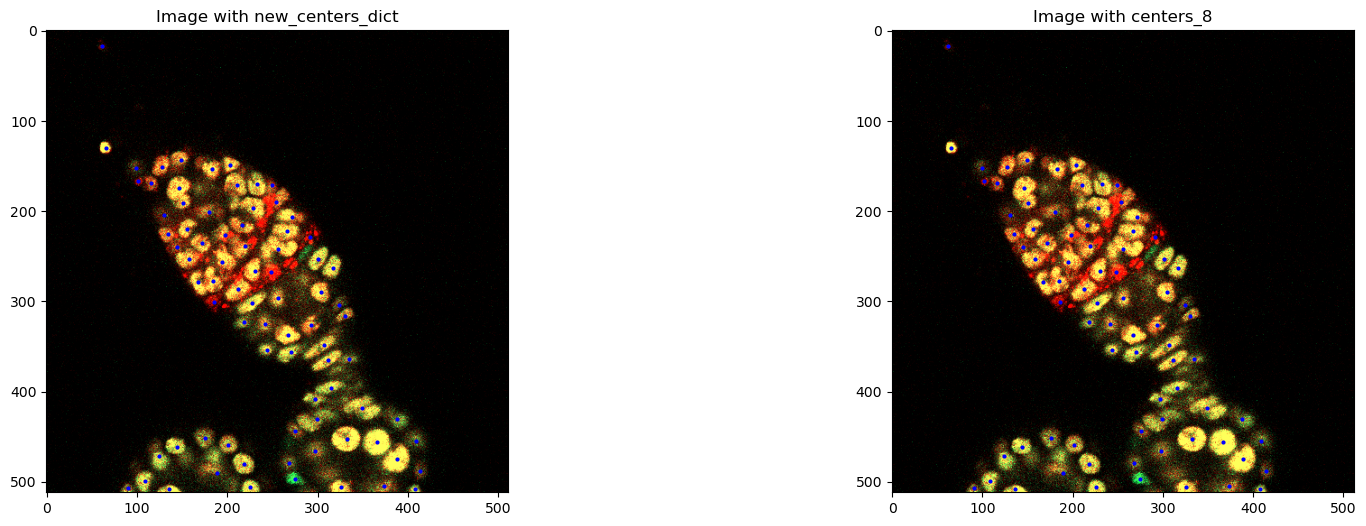

In [95]:
# Display the images side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

# Plot new_centers_dict
ax1.imshow(img_8, cmap='nipy_spectral')
for center in slice.values():
    ax1.plot(center[1], center[0], 'bo', markersize=2)  # 'ro' means red dots
ax1.set_title('Image with new_centers_dict')

# Plot centers2
ax2.imshow(img_8, cmap='nipy_spectral')
for center in centers_8:
    ax2.plot(center[1], center[0], 'bo', markersize=2)  # 'bo' means blue dots
ax2.set_title('Image with centers_8')

plt.show()

In [70]:
from skimage.measure import label, regionprops
from skimage.color import label2rgb

# Assuming 'edges' is your binary image
# Label the image
labeled_img = label(edges)

# Calculate properties of labeled regions
props = regionprops(labeled_img)

# Get the center of each region
centers = [prop.centroid for prop in props]

# Display the image with centers
image_label_overlay = label2rgb(labeled_img, image=edges)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay, cmap='nipy_spectral')

for center in centers:
    ax.plot(center[1], center[0], 'ro', markersize=2)  # 'ro' means red dots

plt.show()


NameError: name 'edges' is not defined

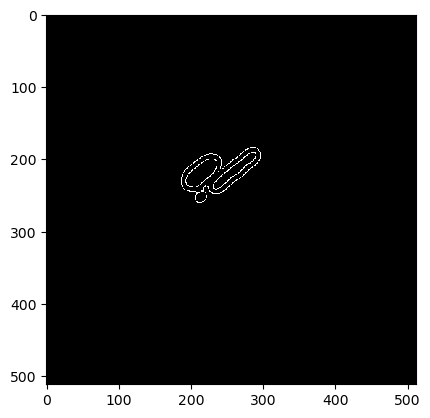

In [31]:
from skimage import feature
from skimage.color import rgb2gray

# Assuming img_array is your grayscale image
img_gray = rgb2gray(img_array)
edges = feature.canny(img_gray, sigma=3)

plt.imshow(edges, cmap='gray', interpolation='none')
plt.show()

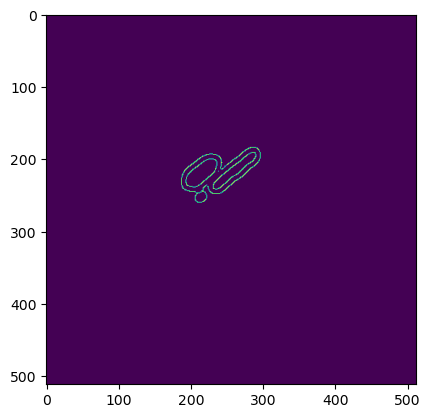

In [32]:
plt.imshow(edges)

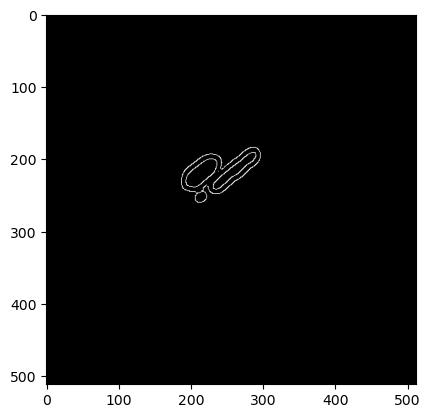

In [33]:
from skimage.feature import peak_local_max
from skimage.measure import label
from skimage.segmentation import mark_boundaries, watershed
from scipy import ndimage
import numpy as np

# Compute the Euclidean distance from every binary pixel
# to the nearest zero pixel and return a transformed image
distance = ndimage.distance_transform_edt(edges)

# Find peaks in this distance map
coordinates = peak_local_max(distance, labels=edges)

# Create an empty image to hold the peaks
peaks = np.zeros_like(edges, dtype=bool)

# Set the pixels at the peak coordinates to True
peaks[coordinates[:, 0], coordinates[:, 1]] = True

# Perform a connected component analysis on the local peaks
markers = label(peaks)

# Apply the watershed algorithm
labels = watershed(-distance, markers, mask=edges)

# Display the results
plt.imshow(peaks, cmap='gray')
plt.show()

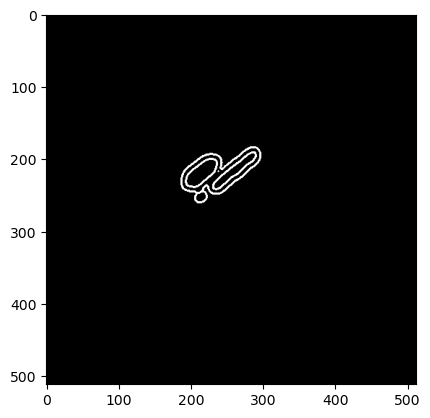

In [34]:
from skimage import segmentation
import matplotlib.pyplot as plt

# Assuming 'labels' is the output of your segmentation algorithm
boundaries = segmentation.find_boundaries(labels)

plt.imshow(boundaries, cmap='gray')
plt.show()

In [ ]:
I_flat = labels.reshape(-1, 262144)
len(np.unique(I_flat))


In [ ]:
cells2[0]

In [ ]:
labels[246][:]

In [ ]:
centers2

In [ ]:
# Assuming test_image is a numpy array of shape (height, width, channels)
height, width, _ = labels.shape

# Initialize an empty dictionary to hold the color to label mappings
color_to_label = {}
label = 0  # Initialize label counter

# Initialize an empty dictionary to hold the label to color mappings
label_to_color = {}

# Iterate over each pixel in the image
for x in range(height):
    for y in range(width):
        color = tuple(labels[x, y])
        # Check if the color is already in the dictionary
        if color not in color_to_label and color != (255, 255, 255) and color != (0, 255, 0):
            # Assign a new label to this unique color
            color_to_label[color] = label
            label_to_color[label] = color
            label += 1  # Increment label for the next unique color

# Now, color_to_label contains mappings from colors to labels
# and label_to_color contains mappings from labels to colors

# If you need to create a labeled image based on these mappings:
labeled_image = np.zeros((height, width, 3), dtype=np.uint8)

# Assign labels to the original image based on the color
for x in range(height):
    for y in range(width):
        color = tuple(labels[x, y])
        if (color == (255, 255, 255)) or (color == (0, 255, 0)):
            continue
        label = color_to_label[color]
        # Here you can decide how to use the label. For example, you might want to:
        # - Directly use the label as a color (if it makes sense in your context)
        # - Map the label to a specific color using label_to_color
        # For demonstration, let's just copy the original color using the label
        labeled_image[x, y] = np.array(label_to_color[label], dtype=np.uint8)

# labeled_image now contains the image with labels assigned to each pixel

In [ ]:
# Initialize cells array with the correct shape
rows2, cols2 = (len(color_to_label), 0)
# method 2 1st approach
cells2 = [[] for _ in range(rows2)]

In [ ]:
for x in range(height):
    for y in range(width):
        color = tuple(img_array[x, y])
        if (color == (255, 255, 255)) or (color == (0, 255, 0)):
            continue 
        label = color_to_label[color]
        cells2[label].append(tuple((x, y)))

In [ ]:
centers2 = []
for arr in cells2:
    total = (0,0)
    count = 0
    for point in arr:
        total = tuple(map(sum, zip(total, point)))
        count += 1
    
    if arr.__len__() == 0:
        continue
    center = tuple(x/count for x in total)
    centers2.append(center)

In [ ]:
centers2

In [ ]:
from skimage import measure
import matplotlib.pyplot as plt

# Assuming 'labels' is the output of your segmentation algorithm
regions = measure.regionprops(labels)

fig, ax = plt.subplots()
ax.imshow(img_array, cmap=plt.cm.gray)

for center in centers2:
    #y0, x0 = props.centroid
    ax.plot(center[0], center[1], 'ro', markersize=1)

plt.show()

In [ ]:
from skimage.measure import label, regionprops
from skimage.color import label2rgb

# Assuming 'edges' is your binary image
# Label the image
labeled_img = label(mark_boundaries(img_gray, labels))

# Calculate properties of labeled regions
props = regionprops(labeled_img)

# Get the center of each region
centers = [prop.centroid for prop in props]

# Display the image with centers
image_label_overlay = label2rgb(labeled_img, image=compare_image)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for center in centers:
    ax.plot(center[1], center[0], 'ro', markersize=2)  # 'ro' means red dots

plt.show()

In [ ]:
from skimage.morphology import medial_axis

# Assuming 'edges' is your binary image from Canny edge detection
thin_edges = medial_axis(edges)

# Display the image
plt.imshow(thin_edges, cmap='gray')
plt.show()

In [ ]:
from skimage import filters, feature

# Assuming 'compare_image' is your grayscale image
# Calculate Sobel gradient
sobel = filters.sobel(compare_image)

# Calculate threshold
threshold = np.mean(sobel)

# Apply threshold to create binary mask
fudge_factor = 0.5
binary_mask = sobel > (threshold * fudge_factor)

In [ ]:
plt.imshow(binary_mask.astype(np.float64))

In [ ]:
binary_mask

In [ ]:
from scipy.ndimage import binary_dilation
from skimage.morphology import rectangle

# Create two perpendicular linear structuring elements
se90 = rectangle(1, 3)  # Vertical line (90 degrees)
se0 = rectangle(3, 1)  # Horizontal line (0 degrees)

# Dilate the binary mask using the vertical structuring element followed by the horizontal structuring element
binary_mask_dilated = binary_dilation(binary_mask)
binary_mask_dilated = binary_dilation(binary_mask_dilated)

# Display the dilated binary mask
plt.imshow(binary_mask_dilated.astype(np.float64), cmap='gray')
plt.title('Dilated Gradient Mask')
plt.show()

In [ ]:
from skimage.color import rgb2gray

# Convert the image to grayscale if it's a color image
if len(binary_mask_dilated.shape) > 2:
    binary_mask_dilated = rgb2gray(binary_mask_dilated)

# Now you can apply the erosion
binary_mask_smooth = binary_erosion(binary_mask_dilated, seD)
binary_mask_smooth = binary_erosion(binary_mask_smooth, seD)

# Display the smoothed binary mask
plt.imshow(binary_mask_smooth, cmap='gray')
plt.title('Segmented Image')
plt.show()

In [ ]:
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches

# Label each cell
labels = label(binary_mask_smooth)

fig, ax = plt.subplots()
ax.imshow(binary_mask_smooth, cmap='gray')

# Compute properties of each cell
props = regionprops(labels)

# Plot the center of each cell
for prop in props:
    y, x = prop.centroid
    c = mpatches.Circle((x, y), radius=5, color='red')
    ax.add_patch(c)

plt.show()

In [ ]:
from skimage.morphology import skeletonize

# Assuming 'edges' is your binary image
skeleton = skeletonize(edges)

# Display the skeleton
plt.imshow(skeleton, cmap='gray')
plt.show()

In [ ]:
# Assuming original_img is your original image and it's in the same size with edges
overlay = compare_image.copy()
overlay[edges] = [255, 0, 0]  # Highlight edges in red
plt.imshow(overlay)
plt.show()

In [ ]:
plt.imshow(compare_image, interpolation='none')

# Plot the centers
for center in centers2:
    plt.plot(center[0], center[1], 'ro', markersize=1)  # 'ro' means red dots

plt.show()

In [ ]:
test_image[243][211]

In [ ]:
import matplotlib.pyplot as plt

# Plot the labeled image
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plt.imshow(labeled_image, cmap='grey', interpolation='none')  # 'nipy_spectral' is a good colormap for distinct colors
plt.colorbar()  # Show color scale
plt.title('Labeled Image')

plt.show()

In [ ]:
labeled_image.shape

In [ ]:
# Convert the data type of labeled_image to uint8
#labeled_image = labeled_image.astype(np.uint8)

# Save the labeled image
iio.imwrite('labeled_image.png', test_image)

In [ ]:
print(unique_labels)

In [ ]:
# Loop through all files in t1 and add each cell in a new position to a vector of all the cells with their x, y center
cells = []

for file in t1:
    im = iio.imread(file)

    unique_labels = np.unique(im)
    #unique_labels[unique_labels != 0]

    for label in unique_labels:
        positions = np.argwhere(im == label)
        center = positions.mean(axis=0)
        cells.append(center)
    


In [ ]:
len(cells)

In [ ]:
cells = []

labeled_image = assign_labels_to_colors(test_image)
print(labeled_image)